Why this one?

Based on properties of our dataset, the description on scikit and this article: https://towardsdatascience.com/5-feature-selection-method-from-scikit-learn-you-should-know-ed4d116e4172, we assumed that the Univariate Feature Selection is the best.

As number of features, we selected 20. 

In [69]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_classif, f_regression, mutual_info_classif

pd.set_option('display.max_columns', None)


In [59]:
url = "train_new_names.csv"


df = pd.read_csv(url)


In [47]:
df.head()

,Id,Monthly rent payment,number of all rooms in the house,=1 Overcrowding by rooms,=1 has toilet in the household,=1 if the household has refrigerator,Total males in the household,Total persons in the household,size of the household,years of schooling,=1 if predominant material on the outside wall is waste material,=1 if no floor at the household,=1 if the house has ceiling,=1 if no water provision,=1 no electricity in the dwelling,=1 no main source of energy used for cooking (no kitchen),=1 if disable person,=1 if male,=1 if married,=1 if divorced,=1 if widow/er,=1 if single,Household level identifier,Number of children 0 to 19 in household,Dependency rate,years of education of male head of household,years of education of female head of household,# persons per room,=1 own and fully paid house,=1 rented,=1 region Central,=1 region Chorotega,=1 region PacÃƒÆ’Ã‚Â­fico central,=1 region Brunca,=1 region Huetar AtlÃƒÆ’Ã‚Â¡ntica,=1 region Huetar Norte,=1 zona urbana,Age in years
0,ID_2f6873615,NaN,5,0,1,1,2,3,3,0,0,0,1,0,0,0,0,1,0,0,0,0,72958b30c,1,0.5,no,17,1.5,1,0,1,0,0,0,0,0,1,4
1,ID_1c78846d2,NaN,5,0,1,1,2,3,3,16,0,0,1,0,0,0,0,1,1,0,0,0,72958b30c,1,0.5,no,17,1.5,1,0,1,0,0,0,0,0,1,41
2,ID_e5442cf6a,NaN,5,0,1,1,2,3,3,17,0,0,1,0,0,0,0,0,1,0,0,0,72958b30c,1,0.5,no,17,1.5,1,0,1,0,0,0,0,0,1,41
3,ID_a8db26a79,NaN,14,0,1,1,1,1,1,16,0,0,1,0,0,0,0,1,0,0,0,0,5b598fbc9,0,no,16,no,1.0,1,0,1,0,0,0,0,0,1,59
4,ID_a62966799,175000.0,4,0,1,1,0,1,1,11,0,0,1,0,0,0,0,0,0,0,0,1,1e2fc704e,1,8,no,11,0.5,0,1,1,0,0,0,0,0,1,18


In [60]:
X = df.drop('Target', axis = 1)

#cannot use identifier for estimation purposes
X = X.drop("Id", axis = 1)

#cannot use household level identifier for target estimations
X = X.drop("Household level identifier", axis = 1)

#Included yes, no and years: excluded
X = X.drop("Dependency rate", axis = 1)

X = X.replace(np.nan, 0)

X = X.replace("no", 0)

X = X.replace("yes", 1)

y = df[["Target"]]

X.head(20)


,Monthly rent payment,=1 Overcrowding by bedrooms,number of all rooms in the house,=1 Overcrowding by rooms,=1 has toilet in the household,=1 if the household has refrigerator,owns a tablet,number of tablets household owns,Males younger than 12 years of age,Males 12 years of age and older,Total males in the household,Females younger than 12 years of age,Females 12 years of age and older,Total females in the household,persons younger than 12 years of age,persons 12 years of age and older,Total persons in the household,size of the household,TamViv,years of schooling,Years behind in school,household size,=1 if predominant material on the outside wall is block or brick,"=1 if predominant material on the outside wall is socket (wood, zinc or absbesto",=1 if predominant material on the outside wall is prefabricated or cement,=1 if predominant material on the outside wall is waste material,=1 if predominant material on the outside wall is wood,=1 if predominant material on the outside wall is zink,=1 if predominant material on the outside wall is natural fibers,=1 if predominant material on the outside wall is other,"=1 if predominant material on the floor is mosaic, ceramic, terrazo",=1 if predominant material on the floor is cement,=1 if predominant material on the floor is other,=1 if predominant material on the floor is natural material,=1 if no floor at the household,=1 if predominant material on the floor is wood,=1 if predominant material on the roof is metal foil or zink,"=1 if predominant material on the roof is fiber cement, mezzanine",=1 if predominant material on the roof is natural fibers,=1 if predominant material on the roof is other,=1 if the house has ceiling,=1 if water provision inside the dwelling,=1 if water provision outside the dwelling,=1 if no water provision,"=1 electricity from CNFL, ICE, ESPH/JASEC",=1 electricity from private plant,=1 no electricity in the dwelling,=1 electricity from cooperative,=1 no toilet in the dwelling,=1 toilet connected to sewer or cesspool,=1 toilet connected to septic tank,=1 toilet connected to black hole or letrine,=1 toilet connected to other system,=1 no main source of energy used for cooking (no kitchen),=1 main source of energy used for cooking electricity,=1 main source of energy used for cooking gas,=1 main source of energy used for cooking wood charcoal,=1 if rubbish disposal mainly by tanker truck,=1 if rubbish disposal mainly by botan hollow or buried,=1 if rubbish disposal mainly by burning,=1 if rubbish disposal mainly by throwing in an unoccupied space,"=1 if rubbish disposal mainly by throwing in river, creek or sea",=1 if rubbish disposal mainly other,=1 if walls are bad,=1 if walls are regular,=1 if walls are good,=1 if roof are bad,=1 if roof are regular,=1 if roof are good,=1 if floor are bad,=1 if floor are regular,=1 if floor are good,=1 if disable person,=1 if male,=1 if female,=1 if less than 10 years old,=1 if free or coupled uunion,=1 if married,=1 if divorced,=1 if separated,=1 if widow/er,=1 if single,=1 if household head,=1 if spouse/partner,=1 if son/doughter,=1 if stepson/doughter,=1 if son/doughter in law,=1 if grandson/doughter,=1 if mother/father,=1 if father/mother in law,=1 if brother/sister,=1 if brother/sister in law,=1 if other family member,=1 if other non family member,Number of children 0 to 19 in household,Number of adults in household,# of individuals 65+ in the household,# of total individuals in the household,years of education of male head of household,years of education of female head of household,average years of education for adults (18+),=1 no level of education,=1 incomplete primary,=1 complete primary,=1 incomplete academic secondary level,=1 complete academic secondary level,=1 incomplete technical secondary level,=1 complete technical secondary level,=1 undergraduate and higher education,=1 postgraduate higher education,number of bedrooms,# persons per room,=1 own and fully paid house,"=1 own, paying in installments",=1 rente

# Overview of models: 
f_classif

    ANOVA F-value between label/feature for classification tasks.
mutual_info_classif

    Mutual information for a discrete target.
    
    
 f_regression

    F-value between label/feature for regression tasks.
mutual_info_regression

    Mutual information for a continuous target.
SelectPercentile

    Select features based on percentile of the highest scores.
SelectKBest

    Select features based on the k highest scores.


Source: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.GenericUnivariateSelect.html


My suggestion: 
- SelectKBest
- mutual_info_classif
- f_regression

=> how any attributes?

# Examples

In [70]:
#Select top 2 features based on mutual info classifier
#version from source
selector = SelectKBest(mutual_info_classif, k = 20)
selector.fit(X, y)


output1 = X.columns[selector.get_support()]

C:\Users\annin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [71]:
#Select top 20 features based on f_regression
#version from https://scikit-learn.org/stable/auto_examples/feature_selection/plot_feature_selection.html
#F-test for feature scoring (further specifcy: )
selector = SelectKBest(f_regression, k= 20)
selector.fit(X, y)


output2 = X.columns[selector.get_support()]

C:\Users\annin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [76]:
print(output1)

print(output2)

Index(['Monthly rent payment', ' number of all rooms in the house',
       'owns a tablet', 'number of tablets household owns',
       'persons younger than 12 years of age', 'years of schooling',
       '=1 if predominant material on the outside wall is block or brick',
       '=1 if the house has ceiling', '=1 if floor are good',
       'Number of children 0 to 19 in household',
       'years of education of male head of household',
       'years of education of female head of household',
       'average years of education for adults (18+)', '# persons per room',
       'escolari squared', 'edjefe squared', 'hogar_nin squared',
       'overcrowding squared', 'dependency squared', 'meaned squared'],
      dtype='object')
Index(['owns a tablet', 'Males younger than 12 years of age',
       'Females younger than 12 years of age',
       'persons younger than 12 years of age', 'years of schooling',
       '=1 if predominant material on the outside wall is block or brick',
       '=1 if p

Identical in both: 
- 'owns a tablet'
- 'persons younger than 12 years of age'
- 'years of schooling'
- '=1 if predominant material on the outside wall is block or brick'
- '=1 if the house has ceiling'
- '=1 if floor are good'
- Number of children 0 to 19 in household'
- 'years of education of male head of household',
- 'average years of education for adults (18+)'
- '# persons per room'
- 'escolari squared'
- 'edjefe squared'
- hogar_nin squared'
- 'overcrowding squared'
- 'meaned squared'

If we choose mutual info regression & f_classifier, we get similar resutls: 
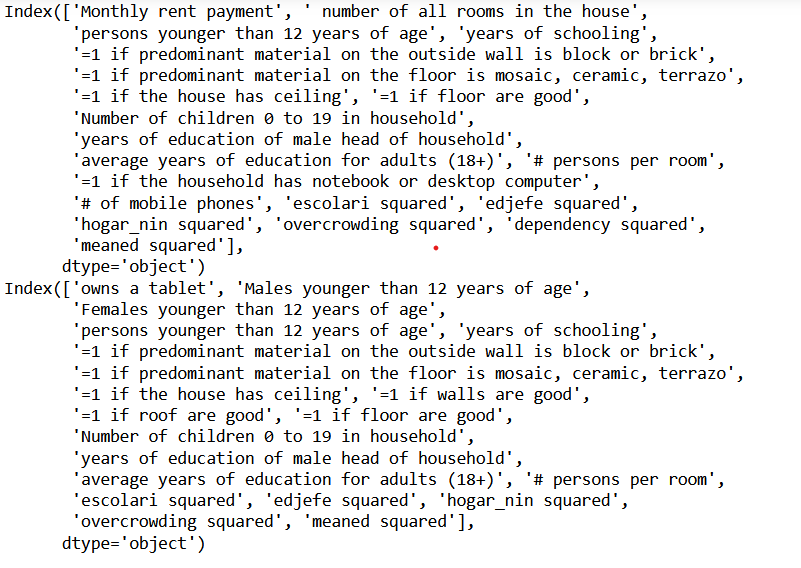